# 100 Years of Baby Names in British Columbia
## Data Wrangling

Data wrangling of baby names in British Columbia from 1915 to 2014. The data includes every first name that was chosen five or more times in a given year, and is published by the British Columbia Vital Statistics Agency. Raw data was downloaded from:

- https://catalogue.data.gov.bc.ca/dataset/most-popular-girl-names-for-the-past-100-years
- https://catalogue.data.gov.bc.ca/dataset/most-popular-boys-names-for-the-past-100-years

In [21]:
import pandas as pd
%matplotlib inline

## Girls Names

In [38]:
group = 'girls'
datafile = f'data/raw/bc-popular-{group}-names.csv'
savefile = f'data/processed/bc-popular-{group}-names.csv'
names_in = pd.read_csv(datafile, index_col=0)
names_in.head()

,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Total
Name,,,,,,,,,,,,,,,,,,,,,
AALIYAH,0,0,0,0,0,0,0,0,0,0,...,19,19,25,24,19,19,21,27,28,308
AANYA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,5,0,0,12
AARYA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,6,11
ABBEY,0,0,0,0,0,0,0,0,0,0,...,5,7,9,9,0,0,0,0,0,127
ABBIE,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,6,5,40


In [26]:
# Stack the data and wrangle with indexes and labels to get the data into a
# convenient format
names = names_in.drop('Total', axis=1).stack().reset_index().set_index('Name')
names.columns = ['Year', 'Count']

# Convert the years from strings to integers
names['Year'] = names['Year'].astype(int)

# Remove all the rows with Count of 0 (we don't need them)
names = names[names['Count'] > 0]
print(names.shape)
names.head()

(42967, 2)


,Year,Count
Name,,
AALIYAH,2000,6
AALIYAH,2001,13
AALIYAH,2002,17
AALIYAH,2003,23
AALIYAH,2004,22


,Yearly Total
Year,
1915,4000
1916,3587
1917,3287
1918,3279
1919,3441


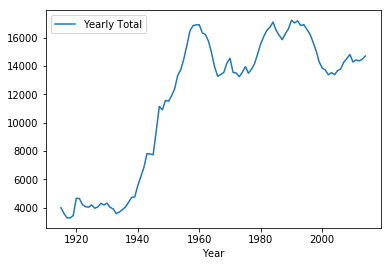

In [30]:
# Compute the total number of names for each year
yearly_totals = names.groupby('Year').sum()
yearly_totals.columns = ['Yearly Total']
yearly_totals.plot.line()
yearly_totals.head()

In [46]:
# Compute each name's fraction of the total in each year

data = names.merge(yearly_totals, left_on='Year', right_index=True)
data['Fraction'] = data['Count'] / data['Yearly Total']

# Drop the Yearly Total column since we don't need it anymore
data = data.drop('Yearly Total', axis=1)

# Sort by name and then by year
data = data.reset_index().sort_values(['Name', 'Year']).set_index('Name')

data.head()

,Year,Count,Fraction
Name,,,
AALIYAH,2000,6,0.000433
AALIYAH,2001,13,0.000948
AALIYAH,2002,17,0.001271
AALIYAH,2003,23,0.001700
AALIYAH,2004,22,0.001644


In [47]:
# Save to CSV file
print(f'Saving to {savefile}')
data.to_csv(savefile)

Saving to data/processed/bc-popular-girls-names.csv


## Boys Names

Consolidate some of the above steps into a function and apply to the boys names data.

In [48]:
def process_names_data(names_in):
    # Stack the data and wrangle with indexes and labels to get the data into a
    # convenient format
    names = names_in.drop('Total', axis=1).stack().reset_index().set_index('Name')
    names.columns = ['Year', 'Count']

    # Convert the years from strings to integers
    names['Year'] = names['Year'].astype(int)

    # Remove all the rows with Count of 0 (we don't need them)
    names = names[names['Count'] > 0]

    # Compute the total number of names for each year
    yearly_totals = names.groupby('Year').sum()
    yearly_totals.columns = ['Yearly Total']
    
    # Compute each name's fraction of the total in each year

    data = names.merge(yearly_totals, left_on='Year', right_index=True)
    data['Fraction'] = data['Count'] / data['Yearly Total']

    # Drop the Yearly Total column since we don't need it anymore
    data = data.drop('Yearly Total', axis=1)

    # Sort by name and then by year
    data = data.reset_index().sort_values(['Name', 'Year']).set_index('Name')
    
    return data

In [51]:
group = 'boys'
datafile = f'data/raw/bc-popular-{group}-names.csv'
savefile = f'data/processed/bc-popular-{group}-names.csv'
boys_names = pd.read_csv(datafile, index_col=0)
boys_data = process_names_data(boys_names)

print(f'Saving to {savefile}')
boys_data.to_csv(savefile)
boys_data.head()

Saving to data/processed/bc-popular-boys-names.csv


,Year,Count,Fraction
Name,,,
AADEN,2008,9,0.000528
AADEN,2009,13,0.000745
AARAV,2010,15,0.000888
AARAV,2011,9,0.000538
AARAV,2012,16,0.000951


In [50]:
boys_data.tail()

,Year,Count,Fraction
Name,,,
ZION,2002,5,0.000313
ZION,2008,7,0.000411
ZION,2012,6,0.000357
ZION,2014,11,0.000641
ZOLTAN,1959,5,0.000268


## Data Exploration

In [58]:
recent = boys_data['Year'] >= 2000
boys_data[recent].groupby('Name').agg({'Count' : 'sum'}).sort_values('Count', ascending=False).head(10)

,Count
Name,
ETHAN,4368
JACOB,3514
LIAM,3337
MATTHEW,3274
JOSHUA,3215
BENJAMIN,2928
ALEXANDER,2861
RYAN,2849
NATHAN,2768


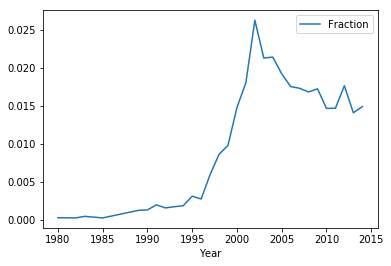

In [63]:
boys_data.loc['ETHAN'].plot(x='Year', y='Fraction')

In [68]:
sorted(boys_data.loc[boys_data.index.str.startswith('Z'), 'Year'].unique())

[1959,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [69]:
boys_data['Year'].max()

2014

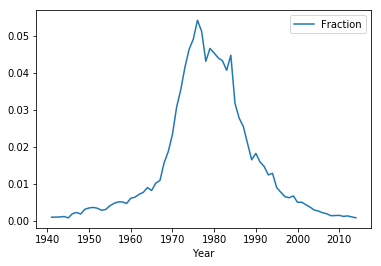

In [72]:
data.loc['JENNIFER'].plot(x='Year', y='Fraction')

In [73]:
df = data.reset_index()
df.head()

,Name,Year,Count,Fraction
0,AALIYAH,2000,6,0.000433
1,AALIYAH,2001,13,0.000948
2,AALIYAH,2002,17,0.001271
3,AALIYAH,2003,23,0.001700
4,AALIYAH,2004,22,0.001644


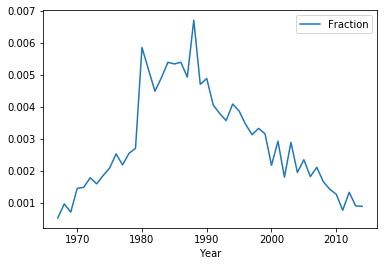

In [75]:
df_sub = df[df['Name'] == 'TIFFANY']
df_sub.plot(x='Year', y='Fraction')